In [ ]:
# TS Moving Average
https://pandas.pydata.org/docs/user_guide/groupby.html

In [ ]:
## Libraries

In [3]:
import numpy as np
import pandas as pd
import datetime

In [9]:
# create data
index = pd.date_range("10/1/2020", periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts.head()

2020-10-01    0.274118
2020-10-02    1.354110
2020-10-03    2.644058
2020-10-04   -1.328079
2020-10-05   -4.237319
Freq: D, dtype: float64

In [10]:
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
ts.head()

2021-01-08    0.054317
2021-01-09    0.051874
2021-01-10    0.006743
2021-01-11   -0.018875
2021-01-12   -0.022323
Freq: D, dtype: float64

In [11]:
ts.tail()

2023-10-01    0.876833
2023-10-02    0.889192
2023-10-03    0.905973
2023-10-04    0.901250
2023-10-05    0.967295
Freq: D, dtype: float64

In [13]:
transformed = ts.groupby(lambda x: x.year).transform( lambda x: (x - x.mean()) / x.std())
transformed
#expect the result to now have mean 0 and standard deviation 1 within each group,

2021-01-08   -1.641781
2021-01-09   -1.656752
2021-01-10   -1.933318
2021-01-11   -2.090309
2021-01-12   -2.111439
                ...   
2023-10-01    1.508654
2023-10-02    1.558455
2023-10-03    1.626072
2023-10-04    1.607040
2023-10-05    1.873174
Freq: D, Length: 1001, dtype: float64

In [14]:
grouped = ts.groupby(lambda x: x.year)
grouped.mean()

2021    0.322229
2022    0.571984
2023    0.502434
dtype: float64

In [15]:
grouped.std()

2021    0.163183
2022    0.158590
2023    0.248168
dtype: float64

In [16]:
grouped_trans = transformed.groupby(lambda x: x.year)
print(grouped_trans.mean())
print(grouped_trans.std())

2021   -6.500077e-16
2022   -2.136495e-15
2023   -3.250797e-16
dtype: float64
2021    1.0
2022    1.0
2023    1.0
dtype: float64


<AxesSubplot:>

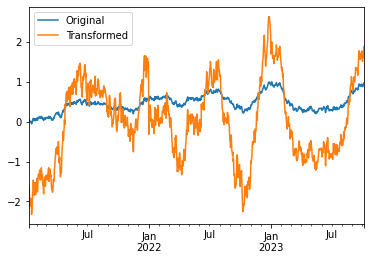

In [17]:
# Visualise
compare = pd.DataFrame({"Original": ts, "Transformed": transformed})
compare.plot()

In [18]:
ts.groupby(lambda x: x.year).transform(lambda x: x.max() - x.min())

2021-01-08    0.648816
2021-01-09    0.648816
2021-01-10    0.648816
2021-01-11    0.648816
2021-01-12    0.648816
                ...   
2023-10-01    0.799634
2023-10-02    0.799634
2023-10-03    0.799634
2023-10-04    0.799634
2023-10-05    0.799634
Freq: D, Length: 1001, dtype: float64

In [20]:
max_ts = ts.groupby(lambda x: x.year).transform("max")
min_ts = ts.groupby(lambda x: x.year).transform("min")
print(max_ts, '\n', min_ts)

2021-01-08    0.591792
2021-01-09    0.591792
2021-01-10    0.591792
2021-01-11    0.591792
2021-01-12    0.591792
                ...   
2023-10-01    1.000105
2023-10-02    1.000105
2023-10-03    1.000105
2023-10-04    1.000105
2023-10-05    1.000105
Freq: D, Length: 1001, dtype: float64 
 2021-01-08   -0.057023
2021-01-09   -0.057023
2021-01-10   -0.057023
2021-01-11   -0.057023
2021-01-12   -0.057023
                ...   
2023-10-01    0.200471
2023-10-02    0.200471
2023-10-03    0.200471
2023-10-04    0.200471
2023-10-05    0.200471
Freq: D, Length: 1001, dtype: float64
